In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('financial_data.csv')
df.head()

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cashflow
0,2021,Apple,365817,94680,351002,287912,104038
1,2021,Microsoft,168088,61271,333779,191791,76740
2,2021,Tesla,53823,5644,62113,30548,11497
3,2022,Apple,394328,99803,352775,302083,122151
4,2022,Microsoft,198270,72738,364840,198298,89035


In [3]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

df['Profit Margin'] = df['Net Income'] / df['Total Revenue']
df['ROA'] = df['Net Income'] / df['Total Assets']

df['Operating Cash Flow Ratio'] = df['Cashflow'] / df['Total Revenue']

df['Debt to Equity'] = df['Total Liabilities'] / (df['Total Assets'] - df['Total Liabilities'])

def calculate_cagr(start_value, end_value, num_years):
    return (end_value / start_value) ** (1 / num_years) - 1

for company in df['Company'].unique():
    company_data = df[df['Company'] == company].sort_values('Year')
    start_revenue = company_data['Total Revenue'].iloc[0]
    end_revenue = company_data['Total Revenue'].iloc[-1]
    df.loc[df['Company'] == company, 'Revenue CAGR'] = calculate_cagr(start_revenue, end_revenue, 3)

df['Asset Turnover'] = df['Total Revenue'] / df['Total Assets']
df['Cash Flow to Net Income Ratio'] = df['Cashflow'] / df['Net Income']

df

,Year,Company,Total Revenue,Net Income,Total Assets,Total Liabilities,Cashflow,Revenue Growth (%),Net Income Growth (%),Profit Margin,ROA,Operating Cash Flow Ratio,Debt to Equity,Revenue CAGR,Asset Turnover,Cash Flow to Net Income Ratio
0,2021,Apple,365817,94680,351002,287912,104038,NaN,NaN,0.258818,0.269742,0.284399,4.563512,0.015670,1.042208,1.098838
1,2021,Microsoft,168088,61271,333779,191791,76740,NaN,NaN,0.364517,0.183568,0.456547,1.350755,0.080293,0.503591,1.252469
2,2021,Tesla,53823,5644,62113,30548,11497,NaN,NaN,0.104862,0.090867,0.213608,0.967781,0.215987,0.866534,2.037030
3,2022,Apple,394328,99803,352775,302083,122151,7.793788,5.410858,0.253096,0.282908,0.309770,5.959185,0.015670,1.117789,1.223921
4,2022,Microsoft,198270,72738,364840,198298,89035,17.956071,18.715216,0.366863,0.199370,0.449059,1.190679,0.080293,0.543444,1.224051
5,2022,Tesla,81462,12587,82338,36440,14724,51.351653,123.015592,0.154514,0.152870,0.180747,0.793934,0.215987,0.989361,1.169778
6,2023,Apple,383285,96995,353583,290437,110543,-2.800461,-2.813543,0.253062,0.274320,0.288409,4.599452,0.015670,1.084003,1.139677
7,2023,Microsoft,211915,72361,411976,205753,87582,6.882030,-0.518299,0.341462,0.175644,0.413288,0.997721,0.080293,0.514387,1.210348
8,2023,Tesla,96773,14997,106618,43009,13256,18.795267,19.146739,0.154971,0.140661,0.136980,0.676146,0.215987,0.907661,0.883910


In [4]:
def plot_metric(df, metric, title=None, ylabel=None):
    plt.figure(figsize=(12, 6))
    companies = df['Company'].unique()
    years = df['Year'].unique()
    width = 0.25
    
    for i, company in enumerate(companies):
        company_data = df[df['Company'] == company]
        plt.bar(company_data['Year'] + i*width, company_data[metric], 
                width=width, label=company)
    
    plt.title(title or f'{metric} by Company')
    plt.xlabel('Year')
    plt.ylabel(ylabel or metric)
    plt.legend()
    plt.xticks(years + width, years)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

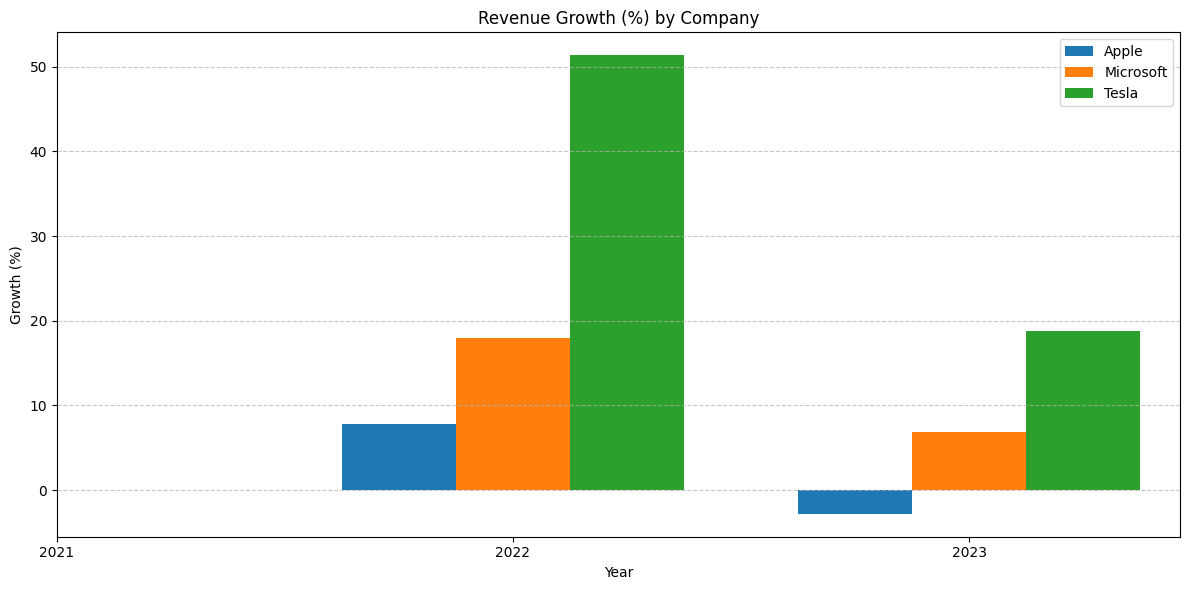

In [5]:
# Revenue Growth (%)
plot_metric(df, 'Revenue Growth (%)', 
            title='Revenue Growth (%) by Company',
            ylabel='Growth (%)')

#### Revenue Growth
This measures the increase in a company's income over a period of time. 

From the plot, we can see that all companies suffered a significant loss in the 2022/2023 Fiscal year.

However, the drop by Tesla is more significant relative to the others though it has a positive Revenue Growth Rate.

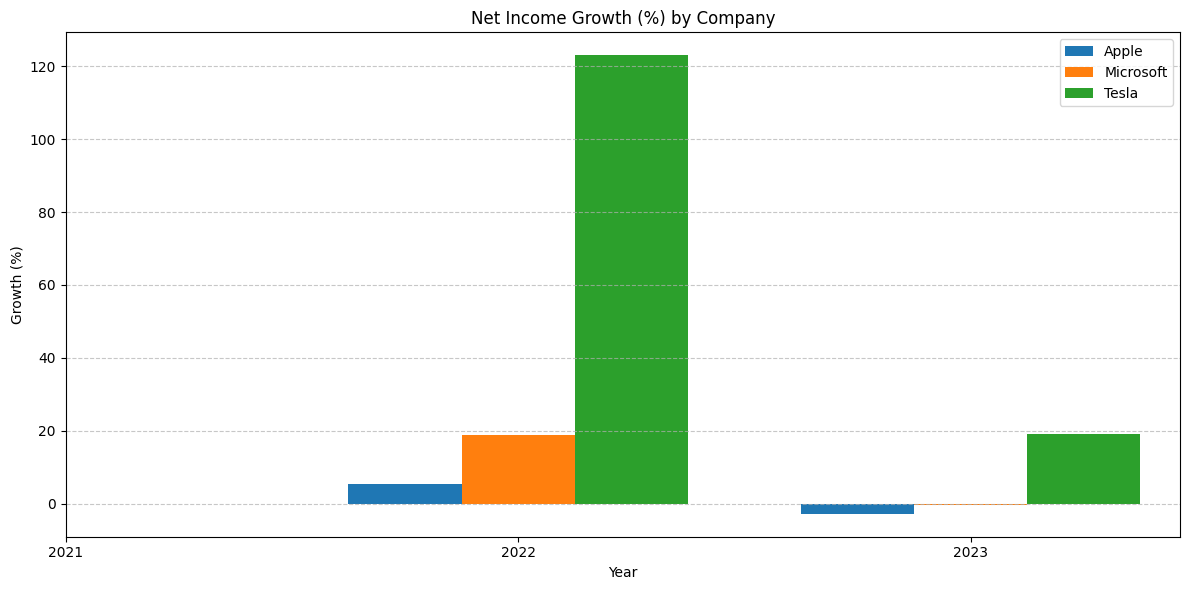

In [6]:
# Net Income Growth (%)
plot_metric(df, 'Net Income Growth (%)', 
            title='Net Income Growth (%) by Company',
            ylabel='Growth (%)')

#### Net Income Growth

Apple had a slight positive growth in 2022 (about 5%) but experienced negative growth in 2023. 

Microsoft showed a moderate positive growth in 2022 (about 20%) but minimal growth in 2023. 

Tesla experienced massive growth in 2022 (over 120%) followed by a significant decrease in 2023 (around 20%); making Tesla the company with the most volatile growth. 

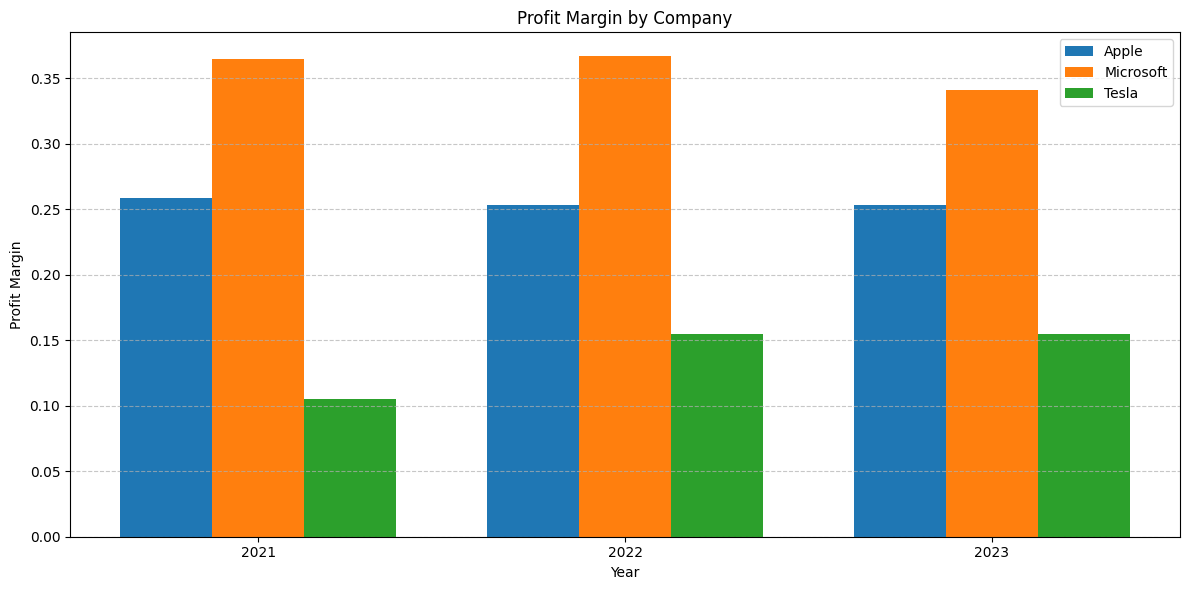

In [7]:
# Profit Margin
plot_metric(df, 'Profit Margin',
            title='Profit Margin by Company',
            ylabel='Profit Margin')

#### Profit Margin 

Microsoft consistently has the highest profit margin, around 35-37%, though it shows a slight decline over the three years. 

Apple maintains a steady profit margin of about 25-26% across all three years.

Tesla starts with the lowest profit margin in 2021 (about 10%) but shows gradual improvement, reaching around 15% by 2023.

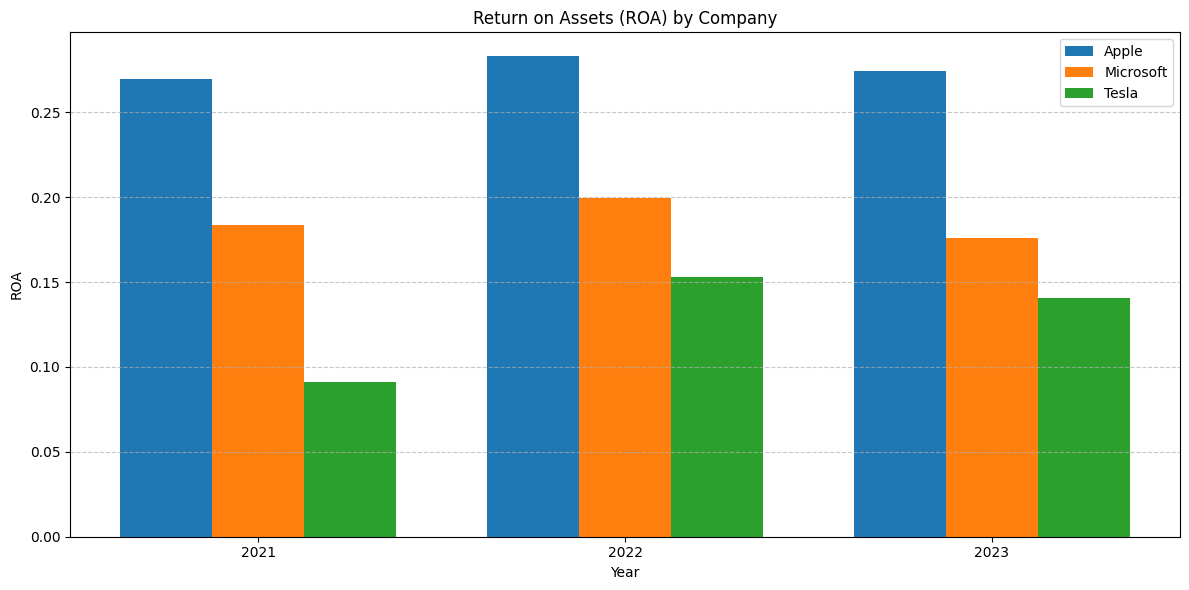

In [8]:
# Return on Assets (ROA)
plot_metric(df, 'ROA',
            title='Return on Assets (ROA) by Company',
            ylabel='ROA')

#### Return on Assets

Apple consistently maintains the highest ROA, around 27-28%, showing slight fluctuations but remaining stable overall. 

Microsoft's ROA fluctuates between 17-20%, peaking in 2022 and declining slightly in 2023.

Tesla shows significant improvement, starting about 9% in 2021 and rising to around 14% by 2023, narrowing the gap with the other companies.

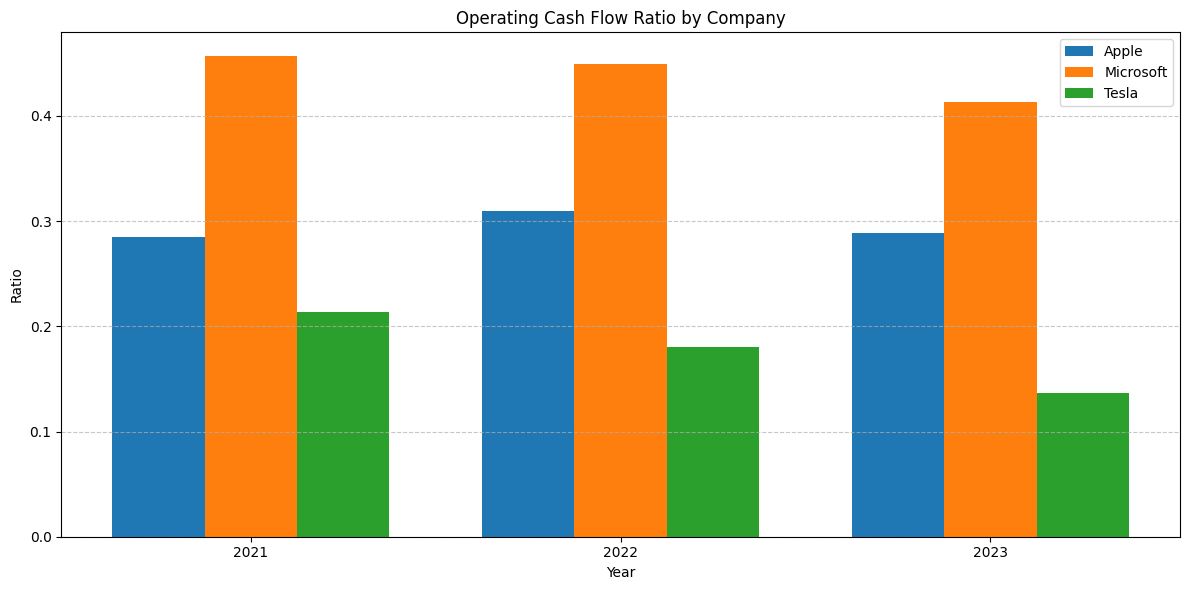

In [9]:
# Operating Cash Flow Ratio
plot_metric(df, 'Operating Cash Flow Ratio',
            title='Operating Cash Flow Ratio by Company',
            ylabel='Ratio')

#### Operating Cash Flow Ratio

Microsoft consistently maintains the highest ratio, ranging from about 0.41 to 0.46, though it shows a slight decline over the three years. 

Apple's ratio is relatively stable, hovering around 0.28 to 0.31, with a small peak in 2022. 

Tesla shows a declining trend, starting at about 0.21 in 2021 and dropping to around 0.13 by 2023. 

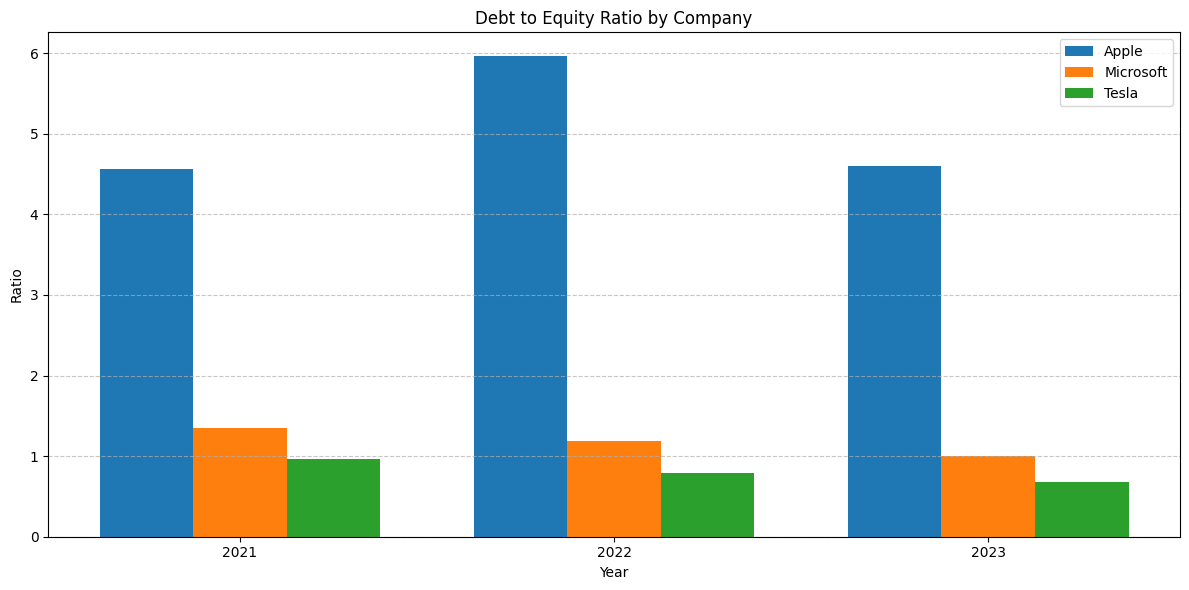

In [10]:
# Debt to Equity Ratio
plot_metric(df, 'Debt to Equity',
            title='Debt to Equity Ratio by Company',
            ylabel='Ratio')

#### Debt to Equity Ratio

Apple consistently has the highest debt to equity ratio, ranging from about 4.5 to 6.0, with a peak in 2022. This suggest that Apple relies more on debt financing compared to the other two companies. 

Microsoft maintains a relatively stable ratio between 1 and 1.5, showing a slight decrease over the three years. 

Tesla has the lowest ratio, starting just below 1 in 2021 and decreasing to about 0.7 by 2023. 

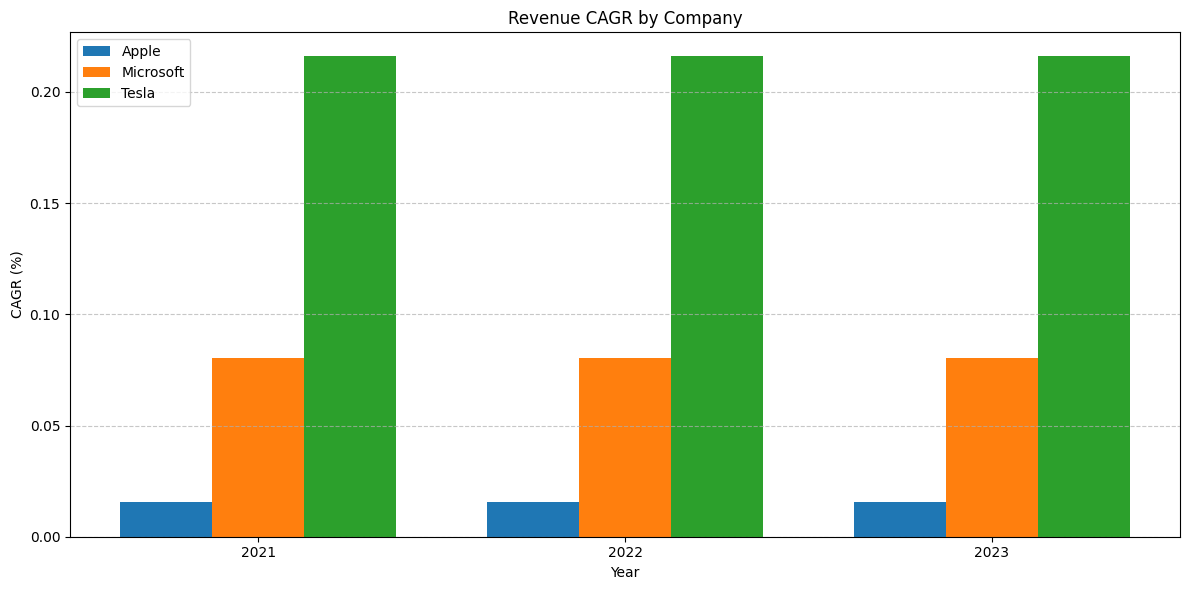

In [11]:
# Revenue CAGR
plot_metric(df, 'Revenue CAGR',
            title='Revenue CAGR by Company',
            ylabel='CAGR (%)')

#### Revenue Compound Annual Growth Rate (Revenue CAGR)
CAGR measures the mean annual growth rate over a specified time period.

Tesla consistently demonstrates the highest CAGR, around 22%, indicating rapid revenue growth

Microsoft maintains a steady CAGR of about 8%, showing consistent moderate growth. 

Apple has the lowest CAGR, approximately 2%, suggesting slower but still positive revenue growth. 

All three companies show positive CAGR, indicating overall revenue growth across the period. 

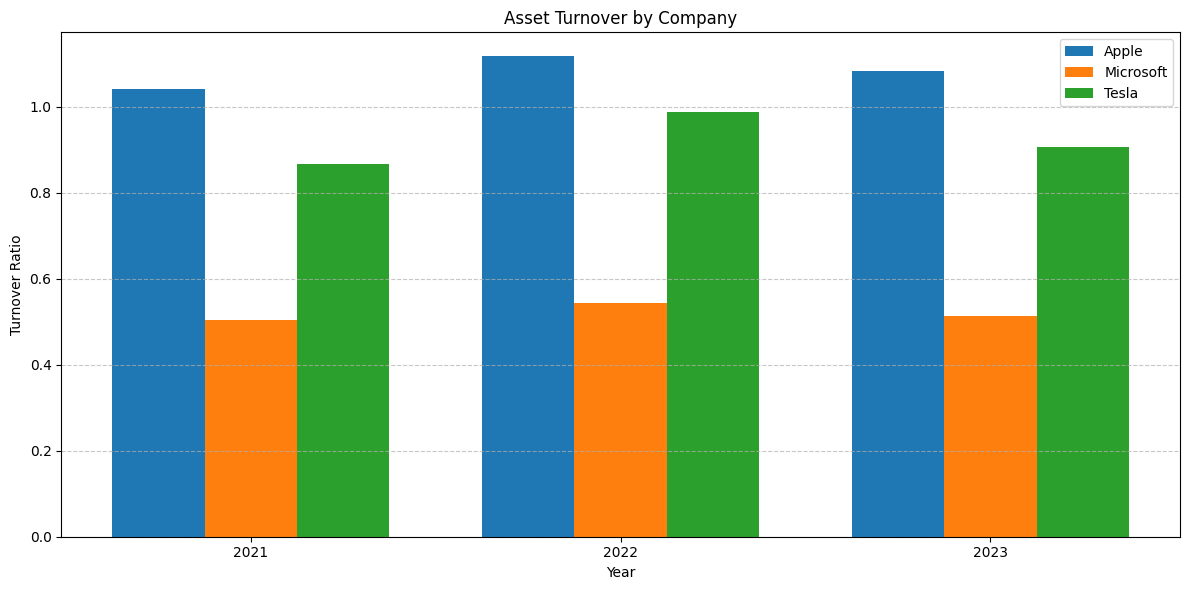

In [12]:
# Asset Turnover
plot_metric(df, 'Asset Turnover',
            title='Asset Turnover by Company',
            ylabel='Turnover Ratio')

#### Asset Turnover Ratio

Apple consistently maintains the highest asset turnover ratio, ranging from 1.05 to 1.15, with a peak in 2022. This indicates that Apple is efficient with using its assets to generate profit.

Tesla shows significant improvement, starting at about 0.85 in 2021, peaking near 1.0 in 2022, and slightly declining to about 0.9 in 2023. 

Microsoft consistently has the lowest ratio, remaining steady around 0.5 across all three years. This low ratio may be as a result of industry characteristics or business model rather than inefficiencies given Microsoft's consistent profitability in other metrics. 

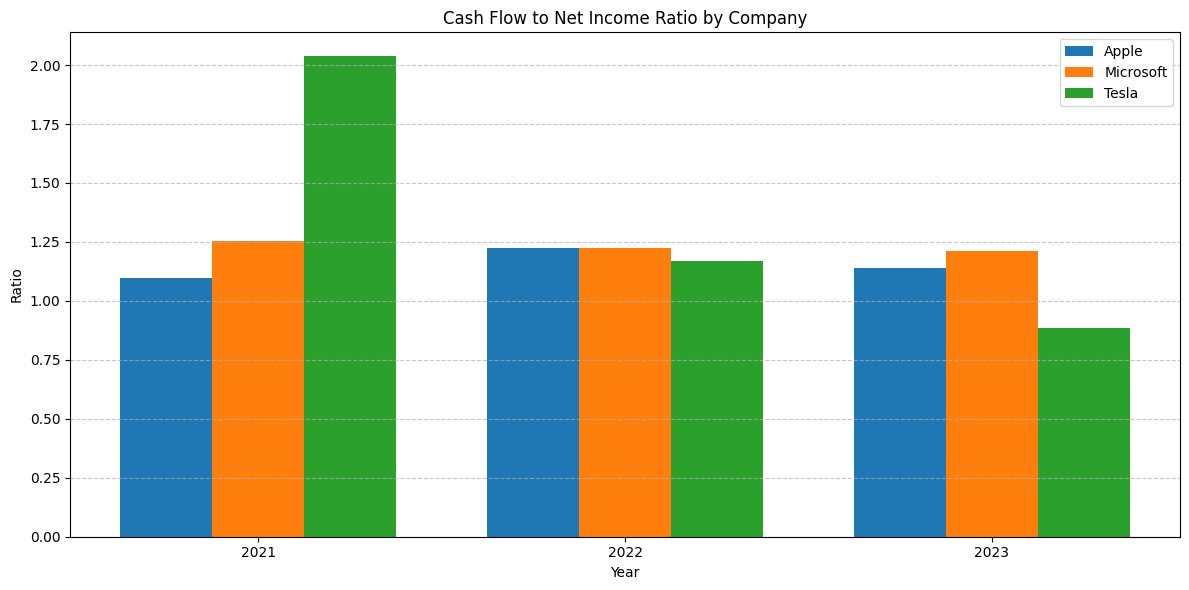

In [13]:
# Cash Flow to Net Income Ratio
plot_metric(df, 'Cash Flow to Net Income Ratio',
            title='Cash Flow to Net Income Ratio by Company',
            ylabel='Ratio')

#### Cash Flow to Net Income Ratio

Tesla shows the most volatile ratio, starting very high about 2.1 in 2021, dropping to around 1.2 in 2022, and further declining to about 0.9 in 2023. 

Microsoft maintains a relatively stable ratio between 1.2 and 1.25 across all three years. 

Apple's ratio is also fairly stable, hovering around 1.1 to 1.2 over the period. 

#### Summary

Apple shows stability and efficiency in most metrics, with high profitability and asset utilization, but slower growth.

Microsoft demonstrates consistent performance across most metrics, with high profit margins and stable cash flow.

Tesla exhibits high growth and improving efficiency, but with more volatility and lower profit margins compared to the other two companies. 